# Mechanics Lab 10 –  Inertial forces on the earth

For today's lab you'll be examining the effect of the Coriolis force on the surface of the earth. 
Generally we don't notice the non-inertial forces acting on us as the earth rotates. However, at sufficiently high velocities and over large enough distances the Coriolis force can have real world effects. For instance, it drives weather patterns, and legend has it that it threw off British gunman in a WWI battle near the Falkland Islands. 

For the sake of simplicity, we'll ignore the centrifugal force in this lab even though it frequently also has a component tangent to the surface of the earth.


## Objectives

In this lab you will 
* determine how to express the Coriolis force in spherical coordinates,
* numerically calculate the trajectory of a object constrained to the surface of a sphere under the influence of the Coriolis force,
* test your code by examining special cases and conserved properties,
* and apply your code to real-world situations.


In [2]:
%pylab inline
from scipy.integrate import odeint  # import the differential 
                                    # equation integrator

Populating the interactive namespace from numpy and matplotlib


## Equations of motion
Let's assume an object is fixed to the surface of the of a perfectly spherical earth. In this case the normal force will perfectly balance the radial component of the net force, and there will be zero velocity or acceleration in the radial direction.

To take advantage of this lovely symmetry, we will want to work the problem in spherical coordinates. Similarly to polar coordinates, the unit vectors change direction with position. In spherical coordinates

![title](Images/SphericalUnitVectors.png)

Therefore, when taking the derivatives of the position vector we find

![title](Images/SphericalVelocityVectors.png)

Using these equations for acceleration, we can write down the equations of motion. For example, since we know that the object won't be accelerating in $\hat{r}$, it is trivial to write the equation of motion in that direction:

![title](Images/ForceEqn.png)

To find the equations of motion in $\hat{\phi}$ and $\hat{\theta}$, we need to be able to express the forces (in this case, the Coriolis force) that can have a non-zero component in those directions. As you know, 

![title](Images/CorForce.png). 

For an object on the surface of the earth, 

![title](Images/Omega_V_eqns.png)


#### Exercise 10.1 
In your lab notebook, work out $\vec{F_{cor}}$ for an object on the surface of the earth in spherical coordinates. You'll need to use the following relations (use your right hand to verify the directions to yourself before solving for the Coriolis force.)

![title](Images/Cross Products.png)


#### Exercise 10.2
Now use your equations for the Coriolis force and acceleration in a spherical coordinate system to write the equations of motion in $\phi$ and $\theta$. Sub in for $v_\theta$ and $v_\phi$ (if you haven't done so already), simplify as much as possible, and solve for $\ddot \phi$ and $\ddot \theta$. Then check your results with your lab instructor. (Hint: what is $\dot r$?)


## Solving the equations of motion
Now that you have the equations of motion, it's time to compute the numerical solution. 

### Setting the initial conditions and other physical parameters
#### Exercise 10.3
Define the parameters of the problem and the initial conditions in the cell below. For now, set the radius of the earth to 1 and the angular speed of the earth, $\Omega$, to 0.1.  Let your initial conditions be $\phi_0 = \pi/4$, $\dot \phi_0 = 0$, $\theta_0 = \pi/4$, $\dot \theta_0 = 0.1$. 

In [3]:
# Defining constants (r and omega) and the initial conditions

r = 1
omega = 0.1
phi_0 = pi/4
phidot_0 = 0
theta_0 = pi/4
thetadot_0 = 0.1

### Numerical integration
 
#### Exercise 10.4
Define a function that will return the derivatives for your four variables, $\phi, \dot \phi, \theta$, and $\dot \theta$. Then use odeint to solve for \\(0 \leq t \ \leq 2 \pi \\). Set max_time to a reasonable amount (about the time it would take for the object to circumnavigate the world at its initial velocity is a good first estimate). In order to ensure an accurate calculation set rtol=1.0e-11 and atol=1.0e-11 in your call to odeint.

In [4]:
# Define the deriv function
# Use odeint to integrate the equations of motion

def deriv(f,time):
    
    phi = f[0]
    phidot = f[1]
    
    theta = f[2]
    thetadot = f[3]
    
    phi_dot_dot = -2*thetadot/tan(theta)*(phidot + omega) 
    theta_dot_dot = phidot*sin(theta)*cos(theta)*(phidot + 2*omega)
    
    return array([phidot, phi_dot_dot, thetadot, theta_dot_dot], float)

time = np.linspace(0,10*pi,10000)

fInit = np.array([phi_0, phidot_0, theta_0, thetadot_0])

fSoln = odeint(deriv, fInit, time, rtol=1.0e-11, atol=1.0e-11)

#### Exercise 10.5
Check your integration by first plotting $\theta$ (colatitude) in degrees vs. $\phi$ (longitude) in degrees. Set the axes of your plot so that the entire possible range of $\phi$ and $\theta$ are visible. 

You may also wish to adjust your plotting so that values of $\phi$ wrap around. In other words, $\phi$ should be limited to the range $-\pi < \phi \leq \pi$. To do this, check out the modulus operator, %.

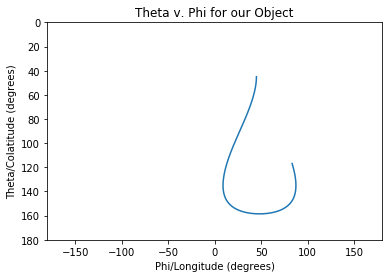

In [40]:
# Plots go here:

phi = fSoln[:,0]
theta = fSoln[:,2]
phi_degree = (phi*180/pi)%360
theta_degree = (theta*180/pi)%360

figure()

plot(phi_degree,theta_degree)
title("Theta v. Phi for our Object")
ylabel("Theta/Colatitude (degrees)")
xlabel("Phi/Longitude (degrees)")
axis([-180, 180, 180, 0])
show()

### Plotting on the surface of a sphere

You can make a potentially more meaningful plot by plotting in 3-D on the surface of a sphere. The following section of code will walk you through how to do this.

#### Exercise 10.6
First, write formulas to calculate the cartesian coordinates of the object based on $\phi$ and $\theta$


In [41]:
# Transformation from spherical to cartesian coordinates

x = r*cos(fSoln[:,0])*sin(fSoln[:,2])
y = r*sin(fSoln[:,0])*sin(fSoln[:,2])
z = r*cos(fSoln[:,2])

#### Exercise 10.7
The following code plots a wire-frame sphere in 3-D. Add a command to plot the (x,y,z) coordinates you calculated above on the sphere using the command *ax.plot(x, y, z)*. If you would like to see the sphere from a different viewing angle, change the values of elev and azim in "ax.view_init."

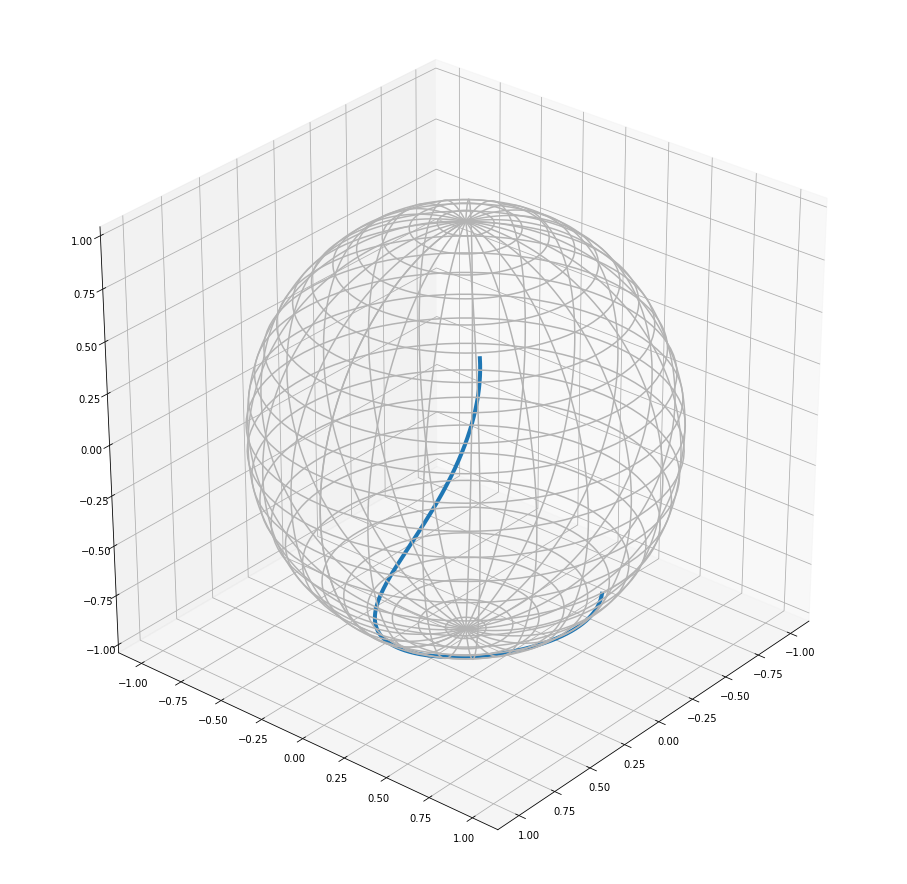

In [42]:
from mpl_toolkits.mplot3d import Axes3D
rEarth = 1
# Set of all spherical angles:
u = linspace(0, 2*pi, 100)
v = linspace(0, pi, 100)

# Cartesian coordinates that correspond to the spherical angles:
# (this is the equation of an sphere):
x_sphere = rEarth*outer(cos(u), sin(v))
y_sphere = rEarth*outer(sin(u), sin(v))
z_sphere = rEarth*outer(ones_like(u), cos(v))

# Plot:
fig = plt.figure(figsize=plt.figaspect(1)*4)  # Square figure
ax = fig.add_subplot(111, projection='3d') # Add a 3-D subplot
ax.plot_wireframe(x_sphere, y_sphere, z_sphere,  rstride=4, cstride=4, color='0.7') #Plot a sphere
ax.view_init(elev=30.,azim=40) #Change the orientation of the plot

# Add call to plot the trajectory below
ax.plot(x,y,z, linewidth=4)

## Verifying your code

#### Exercise10.8
Verify your integration by changing the initial conditions to check at least **two** special cases. Explain whether the results are what you predicted. Include your plots below.
  
  / For the first special case, we set the initial velocity to be 0. According to the formula, we expect the coriolis force to be zero as well. And then we plot the graph through the program and we saw no motion on the graph, which means it matches what we expected./
  / For the second special case, we start from the equator and the velocity is headed East. Because of the right hand rule, the puck will keep moving to the East because the coriolis force is perpendicular of the motion and it is pointed opposite to the normal force./
  

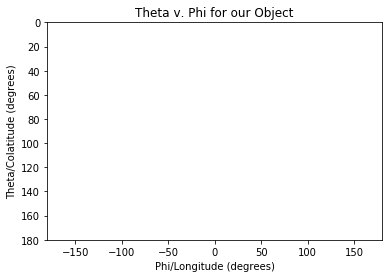

In [87]:
#Include plots here
r = 1
omega = 0.1
phi_0 = pi/4
phidot_0 = 0
theta_0 = pi/4
thetadot_0 = 0

time = np.linspace(0,20*pi,10000)

fInit = np.array([phi_0, phidot_0, theta_0, thetadot_0])

fSoln = odeint(deriv, fInit, time, rtol=1.0e-11, atol=1.0e-11)


phi = fSoln[:,0]
theta = fSoln[:,2]
phi_degree = (phi*180/pi)%360
theta_degree = (theta*180/pi)%360

figure()

plot(phi_degree,theta_degree)
title("Theta v. Phi for our Object")
ylabel("Theta/Colatitude (degrees)")
xlabel("Phi/Longitude (degrees)")
axis([-180, 180, 180, 0])
show()

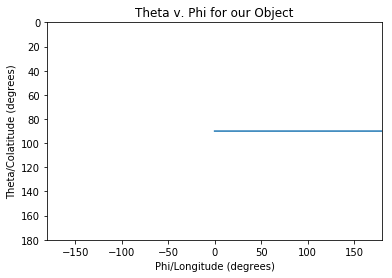

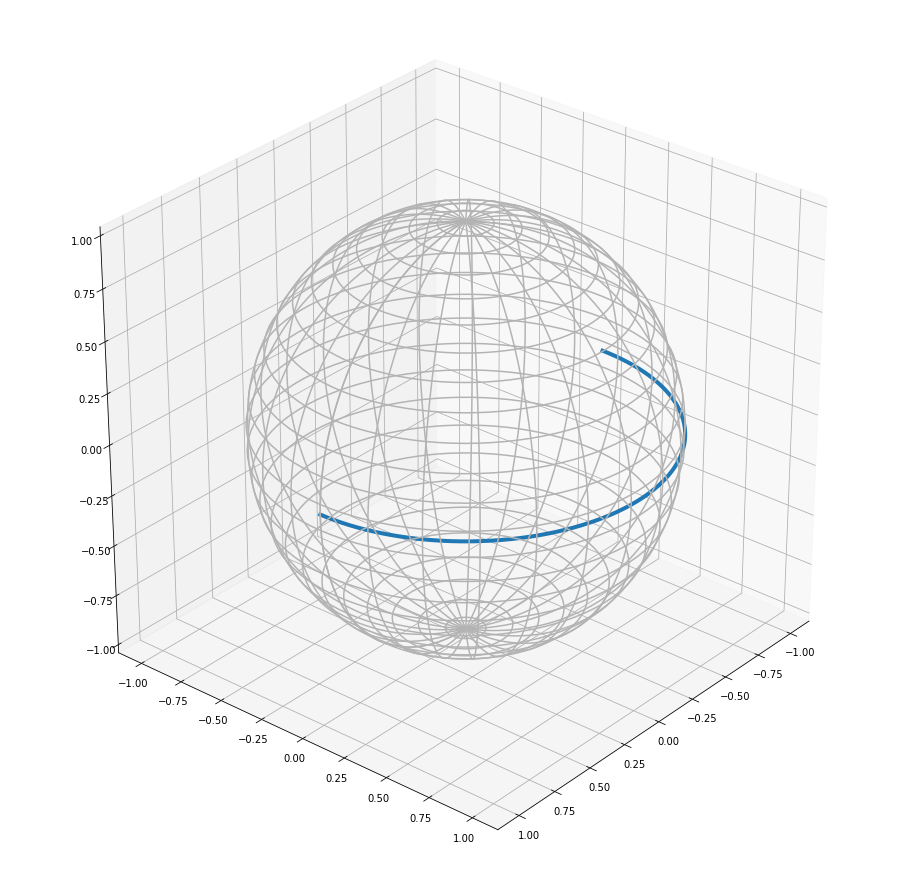

In [91]:

r = 1
omega = 0.1
phi_0 = 0
phidot_0 = 0.1
theta_0 = pi/2
thetadot_0 = 0

time = np.linspace(0,10*pi,10000)

fInit = np.array([phi_0, phidot_0, theta_0, thetadot_0])

fSoln = odeint(deriv, fInit, time, rtol=1.0e-11, atol=1.0e-11)

phi = fSoln[:,0]
theta = fSoln[:,2]
phi_degree = (phi*180/pi)%360
theta_degree = (theta*180/pi)%360

figure()

plot(phi_degree,theta_degree)
title("Theta v. Phi for our Object")
ylabel("Theta/Colatitude (degrees)")
xlabel("Phi/Longitude (degrees)")
axis([-180, 180, 180, 0])
show()
x = r*cos(fSoln[:,0])*sin(fSoln[:,2])
y = r*sin(fSoln[:,0])*sin(fSoln[:,2])
z = r*cos(fSoln[:,2])
from mpl_toolkits.mplot3d import Axes3D
rEarth = 1
# Set of all spherical angles:
u = linspace(0, 2*pi, 100)
v = linspace(0, pi, 100)

# Cartesian coordinates that correspond to the spherical angles:
# (this is the equation of an sphere):
x_sphere = rEarth*outer(cos(u), sin(v))
y_sphere = rEarth*outer(sin(u), sin(v))
z_sphere = rEarth*outer(ones_like(u), cos(v))

# Plot:
fig = plt.figure(figsize=plt.figaspect(1)*4)  # Square figure
ax = fig.add_subplot(111, projection='3d') # Add a 3-D subplot
ax.plot_wireframe(x_sphere, y_sphere, z_sphere,  rstride=4, cstride=4, color='0.7') #Plot a sphere
ax.view_init(elev=30.,azim=40) #Change the orientation of the plot

# Add call to plot the trajectory below
ax.plot(x,y,z, linewidth=4)

Another way to verify your code to examine the speed of the mass over time.

#### Exercise 10.9
How do you expect the Coriolis force to affect the speed of the mass? (Hint: how much work does the Coriolis force do?)

/ If the velocity is parallel to the rotation axis, the coriolis force is zero and the work done by coriolis force is zero as well. If the velocity is straight inward to the axis, the Coriolis force is in the direction of rotation, which means the work don by coriolis force will speed up the mass./

#### Exercise 10.10
Revert your initial conditions back to your first ones. Include the following two plots below: 1) the speed of the puck, the component of the velocity in $\phi$, and the component of the velocity in $\theta$ versus time and 2) the fractional amount the speed changes over time ($(v - v_{init})/v_{init}$ versus t). Make any necessary changes to your integrator and use your velocity plots to justify the accuracy of your code.

/Because the velocity is the opposite direction of the omega, cross product of velocity and omega would be zero, which means that coriolis force does no work. Therefore, the speed is constant. Because from the former 3D graph, we can see that after it goes down, it goes up again. Therefore, the theta velocity is positive in the beginning and then goes to negative. Then, we can observe that it goes to the left and then to the right. Therefore, it goes to negative and then goes to positive. Because along the way, there's slight changes of coriolis force. That may affect the speed a little bit./








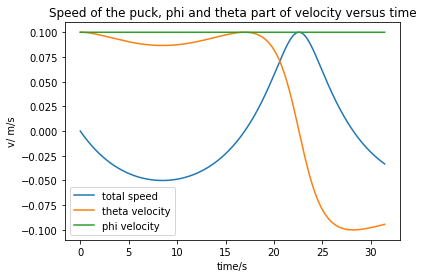

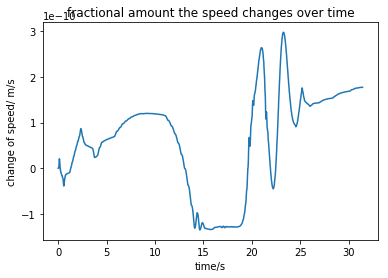

In [9]:
# Include plots here

figure()
plot(time,(r*fSoln[:,1]*sin(fSoln[:,2])),label='total speed')
plot(time,(r*fSoln[:,3]),label='theta velocity')
plot(time,((r*fSoln[:,3])**2 + (r*fSoln[:,1]*sin(fSoln[:,2]))**2)**.5,label='phi velocity')
xlabel('time/s')
ylabel('v/ m/s')
title('Speed of the puck, phi and theta part of velocity versus time')
legend()
show()

v0 = ((r*phidot_0*sin(theta_0))**2 + (r*thetadot_0)**2)**.5
figure()
plot(time,(((r*fSoln[:,1]*sin(fSoln[:,2]))**2 + (r*fSoln[:,3])**2)**.5 - v0)/v0)
xlabel('time/s')
ylabel('change of speed/ m/s')
title('fractional amount the speed changes over time')
show()

## Explore different initial conditions

#### Exercise 10.11
Run your code again using additional initial conditions to answer the following questions. You may wish to change the max_time for your integration as you explore these.

1) What happens to the trajectory as the initial value of $\phi$ increases? Is this what you would have expected? Why?

/The trajectory wouldn't change, but the inital position will move as $\phi$ changes./
   



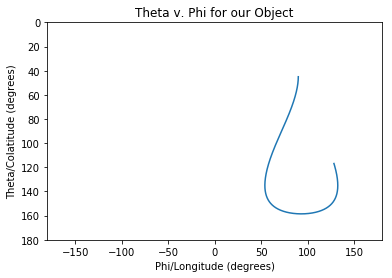

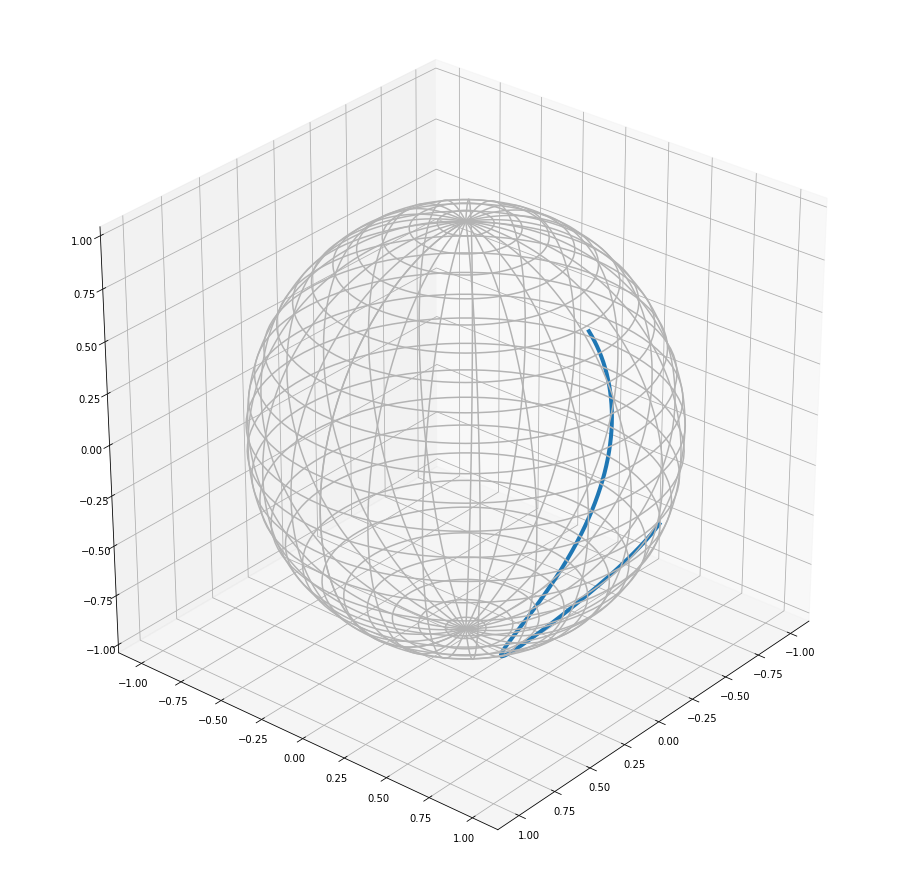

In [92]:
#10.11a
# Include Plots Here

r = 1
omega = 0.1
phi_0 = pi/2
phidot_0 = 0
theta_0 = pi/4
thetadot_0 = 0.1


time = np.linspace(0,10*pi,10000)

fInit = np.array([phi_0, phidot_0, theta_0, thetadot_0])

fSoln = odeint(deriv, fInit, time, rtol=1.0e-11, atol=1.0e-11)

phi = fSoln[:,0]
theta = fSoln[:,2]
phi_degree = (phi*180/pi)%360
theta_degree = (theta*180/pi)%360

figure()

plot(phi_degree,theta_degree)
title("Theta v. Phi for our Object")
ylabel("Theta/Colatitude (degrees)")
xlabel("Phi/Longitude (degrees)")
axis([-180, 180, 180, 0])
show()

x = r*cos(fSoln[:,0])*sin(fSoln[:,2])
y = r*sin(fSoln[:,0])*sin(fSoln[:,2])
z = r*cos(fSoln[:,2])

from mpl_toolkits.mplot3d import Axes3D
rEarth = 1
# Set of all spherical angles:
u = linspace(0, 2*pi, 100)
v = linspace(0, pi, 100)

# Cartesian coordinates that correspond to the spherical angles:
# (this is the equation of an sphere):
x_sphere = rEarth*outer(cos(u), sin(v))
y_sphere = rEarth*outer(sin(u), sin(v))
z_sphere = rEarth*outer(ones_like(u), cos(v))

# Plot:
fig = plt.figure(figsize=plt.figaspect(1)*4)  # Square figure
ax = fig.add_subplot(111, projection='3d') # Add a 3-D subplot
ax.plot_wireframe(x_sphere, y_sphere, z_sphere,  rstride=4, cstride=4, color='0.7') #Plot a sphere
ax.view_init(elev=30.,azim=40) #Change the orientation of the plot

# Add call to plot the trajectory below
ax.plot(x,y,z, linewidth=4)


2) What happens to the trajectory as the initial value of $\theta$ increases? Is this what you would have expected? Why?

/ the motion would change, because the direction of initial velocity changed./

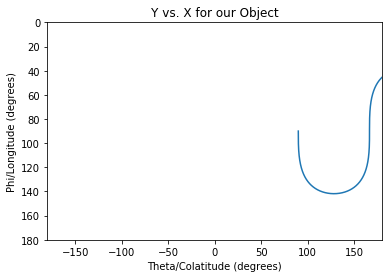

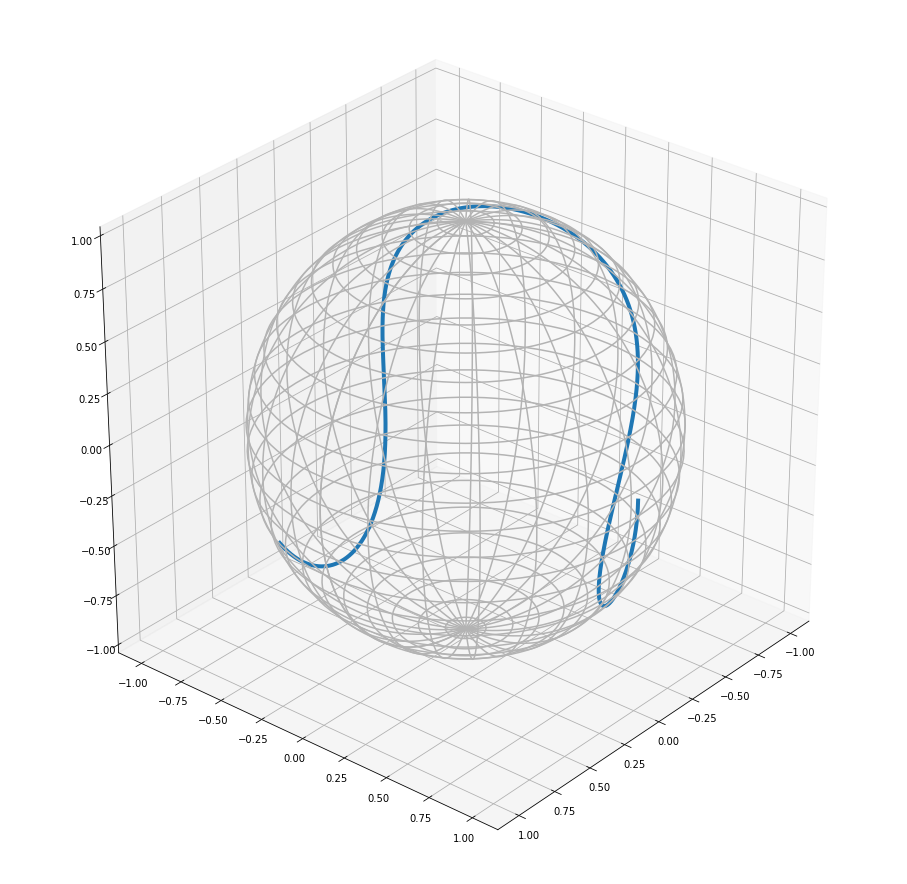

In [95]:
#10.11b
# Include Plots Here
r = 1
omega = 0.1
phi_0 = pi/2
phidot_0 = 0
theta_0 = pi/2
thetadot_0 = 0.1

time = np.linspace(0,20*pi,10000)

fInit = np.array([phi_0, phidot_0, theta_0, thetadot_0])

fSoln = odeint(deriv, fInit, time, rtol=1.0e-11, atol=1.0e-11)

figure()
phi_degree = (fSoln[:,0]*180/pi)%360
theta_degree = (fSoln[:,2]*180/pi)%360
plot(phi_degree,theta_degree)
title("Y vs. X for our Object")
xlabel("Theta/Colatitude (degrees)")
ylabel("Phi/Longitude (degrees)")
axis([-180, 180, 180, 0])
show()

x = r*cos(fSoln[:,0])*sin(fSoln[:,2])
y = r*sin(fSoln[:,0])*sin(fSoln[:,2])
z = r*cos(fSoln[:,2])

from mpl_toolkits.mplot3d import Axes3D
rEarth = 1
# Set of all spherical angles:
u = linspace(0, 2*pi, 100)
v = linspace(0, pi, 100)

# Cartesian coordinates that correspond to the spherical angles:
# (this is the equation of an sphere):
x_sphere = rEarth*outer(cos(u), sin(v))
y_sphere = rEarth*outer(sin(u), sin(v))
z_sphere = rEarth*outer(ones_like(u), cos(v))

# Plot:
fig = plt.figure(figsize=plt.figaspect(1)*4)  # Square figure
ax = fig.add_subplot(111, projection='3d') # Add a 3-D subplot
ax.plot_wireframe(x_sphere, y_sphere, z_sphere,  rstride=4, cstride=4, color='0.7') #Plot a sphere
ax.view_init(elev=30.,azim=40) #Change the orientation of the plot

# Add call to plot the trajectory below
ax.plot(x,y,z, linewidth=4)

3) What happens to the trajectory if the initial velocity is in $\hat \phi$ instead of $\hat \theta$?

/The trajectory wouldn't be the same as well because the direction of velocity has changed. Therefore, the cross product would change and the coriolis force would change./

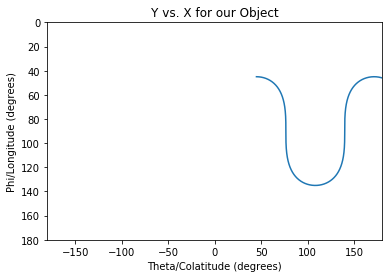

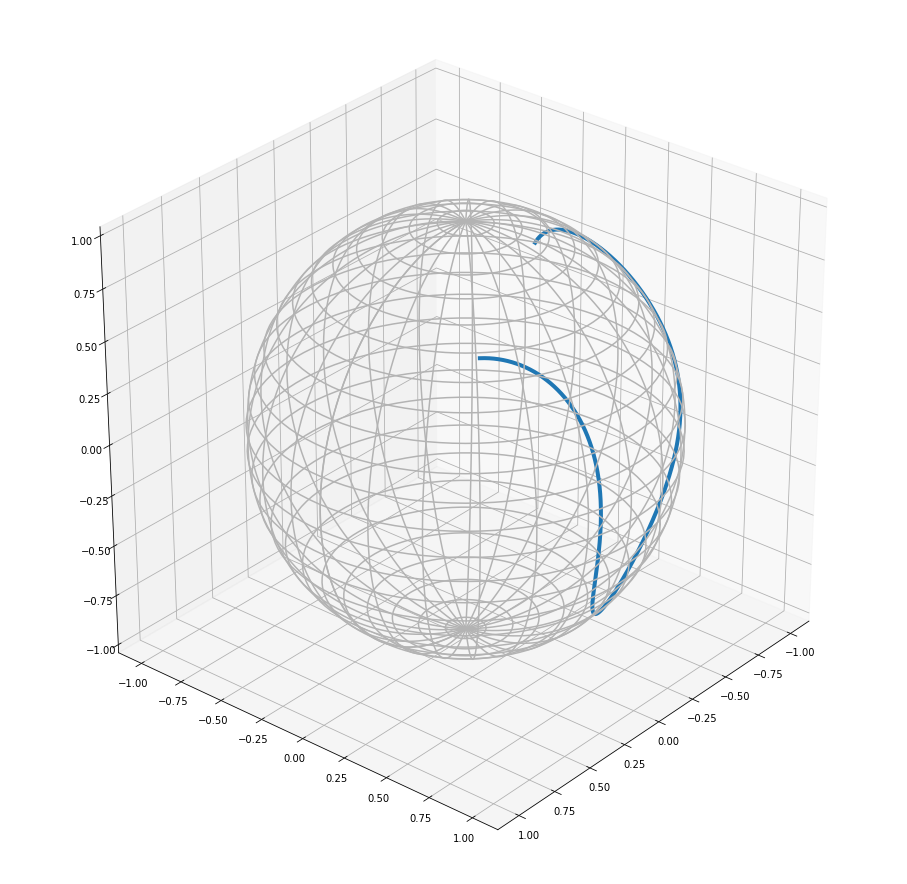

In [99]:
#10.11c
# Include Plots Her
r = 1
omega = 0.1
phi_0 = pi/4
phidot_0 = 0.1
theta_0 = pi/4
thetadot_0 = 0

time = np.linspace(0,20*pi,10000)

fInit = np.array([phi_0, phidot_0, theta_0, thetadot_0])

fSoln = odeint(deriv, fInit, time, rtol=1.0e-11, atol=1.0e-11)

figure()
phi_degree = (fSoln[:,0]*180/pi)%360
theta_degree = (fSoln[:,2]*180/pi)%360
plot(phi_degree,theta_degree)
title("Y vs. X for our Object")
xlabel("Theta/Colatitude (degrees)")
ylabel("Phi/Longitude (degrees)")
axis([-180, 180, 180, 0])
show()

x = r*cos(fSoln[:,0])*sin(fSoln[:,2])
y = r*sin(fSoln[:,0])*sin(fSoln[:,2])
z = r*cos(fSoln[:,2])

from mpl_toolkits.mplot3d import Axes3D
rEarth = 1
# Set of all spherical angles:
u = linspace(0, 2*pi, 100)
v = linspace(0, pi, 100)

# Cartesian coordinates that correspond to the spherical angles:
# (this is the equation of an sphere):
x_sphere = rEarth*outer(cos(u), sin(v))
y_sphere = rEarth*outer(sin(u), sin(v))
z_sphere = rEarth*outer(ones_like(u), cos(v))

# Plot:
fig = plt.figure(figsize=plt.figaspect(1)*4)  # Square figure
ax = fig.add_subplot(111, projection='3d') # Add a 3-D subplot
ax.plot_wireframe(x_sphere, y_sphere, z_sphere,  rstride=4, cstride=4, color='0.7') #Plot a sphere
ax.view_init(elev=30.,azim=40) #Change the orientation of the plot

# Add call to plot the trajectory below
ax.plot(x,y,z, linewidth=4)

4) What happens to the trajectory as the initial velocity decreases?

/The motion will change as well. Because as the initial velocity is pointed at a different direction, the coriolis force will point to a different direction because the coriolis force is cross product of velocity and omega. /

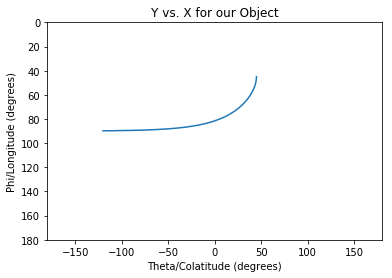

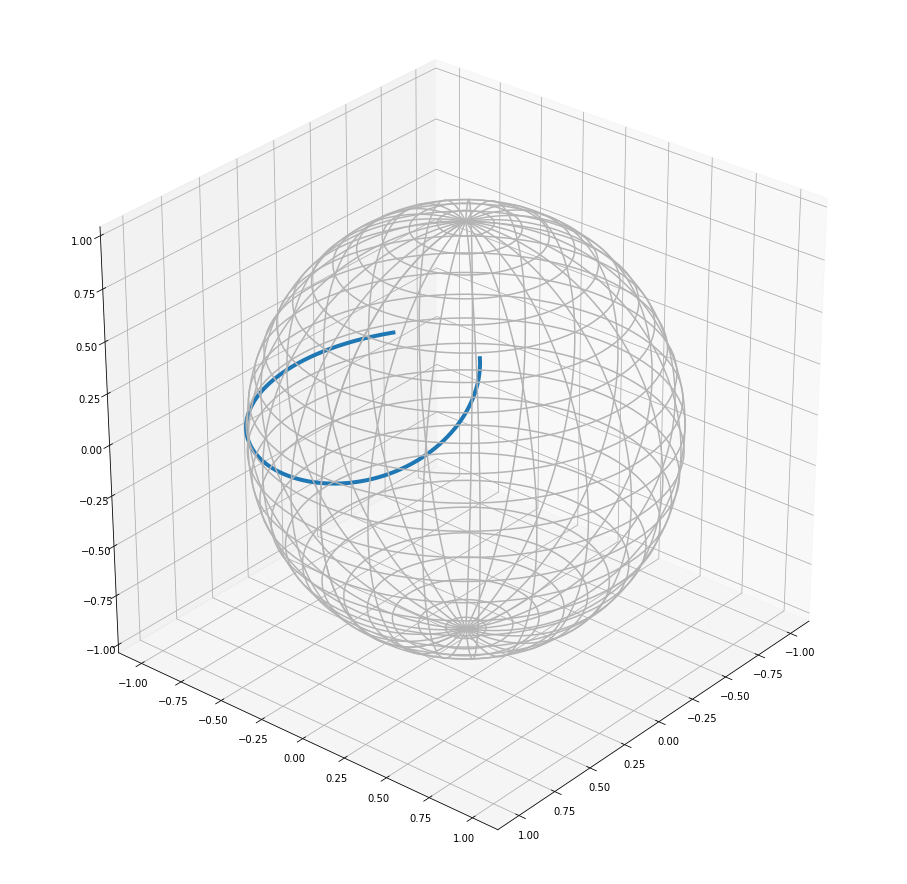

In [102]:
#10.11d
# Include Plots Here
r = 1
omega = 0.1
phi_0 = pi/4
phidot_0 = 0
theta_0 = pi/4
thetadot_0 = 0.05

time = np.linspace(0,20*pi,10000)

fInit = np.array([phi_0, phidot_0, theta_0, thetadot_0])

fSoln = odeint(deriv, fInit, time, rtol=1.0e-11, atol=1.0e-11)
figure()
phi_degree = (fSoln[:,0]*180/pi + 180)%360 - 180
theta_degree = (fSoln[:,2]*180/pi + 180)%360 - 180
plot(phi_degree,theta_degree)
title("Y vs. X for our Object")
xlabel("Theta/Colatitude (degrees)")
ylabel("Phi/Longitude (degrees)")
axis([-180, 180, 180, 0])
show()

x = r*cos(fSoln[:,0])*sin(fSoln[:,2])
y = r*sin(fSoln[:,0])*sin(fSoln[:,2])
z = r*cos(fSoln[:,2])

from mpl_toolkits.mplot3d import Axes3D
rEarth = 1
# Set of all spherical angles:
u = linspace(0, 2*pi, 100)
v = linspace(0, pi, 100)

# Cartesian coordinates that correspond to the spherical angles:
# (this is the equation of an sphere):
x_sphere = rEarth*outer(cos(u), sin(v))
y_sphere = rEarth*outer(sin(u), sin(v))
z_sphere = rEarth*outer(ones_like(u), cos(v))

# Plot:
fig = plt.figure(figsize=plt.figaspect(1)*4)  # Square figure
ax = fig.add_subplot(111, projection='3d') # Add a 3-D subplot
ax.plot_wireframe(x_sphere, y_sphere, z_sphere,  rstride=4, cstride=4, color='0.7') #Plot a sphere
ax.view_init(elev=30.,azim=40) #Change the orientation of the plot

# Add call to plot the trajectory below
ax.plot(x,y,z, linewidth=4)

## Integrate with realistic parameters
Now, try running your code with some realistic values. 

#### Exercise 10.12
Change the parameters to reflect the earth's actual radius and angular velocity in SI units.

In [136]:
# Actual values of the earth's angular velocity (omega) and radius (r)

r = 6.378e6
omega = 1/86400

#### Exercise 10.13
Calculate and plot (in colatitude vs longitude space) what the trajectory of a bullet fired East at 400 m/s from Grinnell, IA will be. For this you'll have to look up the coordinates of Grinnell and translate the velocity into spherical coordinates. (Notice that here we are neglecting how the Coriolis (or centrifugal) force would affect the altitude of the bullet.) Use odeint to solve for the trajectory of the bullet for $ 0 \leq t \le 10$ seconds.

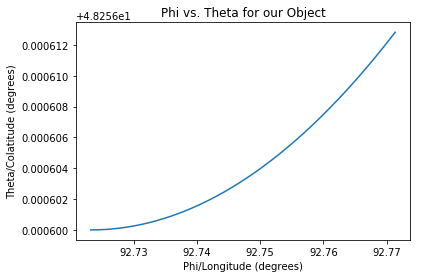

In [137]:
# Trajectory of bullet fired East at 400 m/s from Grinnell, IA
# Fill in code to set initial conditions, integrate, and plot below.

phi_0 = 92.7232*2*pi/360
theta_0 = (90 - 41.7434)*2*pi/360

v0 = 400

phidot_0 = v0/(r*(sin(theta_0)))
thetadot_0 = 0
time = np.linspace(0,10,10000)

fInit = np.array([phi_0,phidot_0,theta_0,thetadot_0])

fSoln = odeint(deriv, fInit, time, rtol=1.0e-11, atol=1.0e-11)

figure()
phi_degree = (fSoln[:,0]*180/pi)%360
theta_degree = (fSoln[:,2]*180/pi)%360
plot(phi_degree, theta_degree)
title("Phi vs. Theta for our Object")
ylabel("Theta/Colatitude (degrees)")
xlabel("Phi/Longitude (degrees)")

show()

#### Exercise 10.14
After 10 seconds how far North-South has the bullet traveled? Compare this to the approximate distance traveled East.

/ The bullet traveled South for 1.43m and traveled East for 4000m. /

In [140]:
#Calculation of distance traveled North-South and East.

print(r*(fSoln[-1,2] - fSoln[0,2]))
print(r*sin(fSoln[0,2])*(fSoln[-1,0] - fSoln[0,0]))

548.6399999748945
0.005004531225425979


#### Exercise 10.15
Now let's assume you are a British gunman in 1914 sailing near the Falkland islands (latitude of 52 degrees south, longitude 59 degrees west) on the battleship *Inflexible*. You are firing directly at the German battleship *Dresden*, which is ten miles to the south of you. Assuming a muzzle-speed of 1800 feet per second, calculate and plot the trajectory of the shell.

Reading from youf plot, by how much and in what direction will the shell be deflected after it has traveled ten miles south?

From looking at the graph, about 7 or 8 meters.

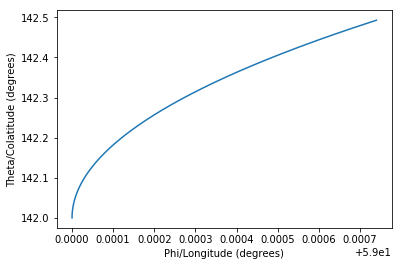

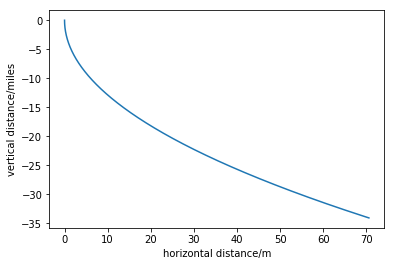

In [150]:
# Fill in code to set initial conditions, integrate, and plot below.

phi_0 = 59*2*pi/360 
theta_0 = (90 + 52)*2*pi/360 #colatitude in radians
phidot_0 = 0
thetadot_0 = 548.64/r #1800 feet per second in meters per second


time = linspace(0.0,100,10000)
fInit = [phi_0,phidot_0,theta_0,thetadot_0] # initial values
fSoln = odeint(deriv,fInit,time)

figure()
phi = fSoln[:,0]*180/pi
theta = fSoln[:,2]*180/pi
plot(phi,theta)
xlabel('Phi/Longitude (degrees)')
ylabel('Theta/Colatitude (degrees)')
show()


figure()
plot((fSoln[:,0] - phi_0)*r*sin(phi_0), ((theta_0 - fSoln[:,2])*r/1610))
xlabel('horizontal distance/m')
ylabel('vertical distance/miles')
show()



## Check-out
#### Exercise 10.16

Briefly summarize in the cell below the ideas in today's lab.

We have learnt different initial conditions for coriolis force and we have some problems which even put coriolis force into practical situations.

## Challenge Problem

Complete the following exercises if you have extra time once you have completed the rest of the lab. These exercises are all centered on adding the centrifugal force.

* See if you can repeat your integration now including the tangental component of the centrifugal force. 
* Re-do your plots from exercises 10.5 -- 10.7 (with the same parameters and initial conditions), and compare the trajectories with the centrifugal force is included and not. 
* Try starting your mass with zero velocity and calculating its trajectory when the centrifugal force is included.